In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('D:/web tech project/ds_salary_proj/dataset/eda_data.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [4]:

#choose relevent columns
df_model = df[['avg_salary','Rating', 'Size','Type of ownership','Industry', 'Sector','Revenue','num_comp','hourly','employer_provided', 'job_state','same_state','age','python_yn','spark','aws','excel','job_simp','seniority','desc_len']]
#get dummy data
#train test split
#multi linear regression 
#lasso regression 
#random forest
#tune models using GridSearchCV
#test ensembles

In [5]:
#get dummy data
df_dum = pd.get_dummies(df_model)

In [6]:
print(df_dum)

     avg_salary  Rating  num_comp  hourly  employer_provided  same_state  age  \
0          72.0     3.8         0       0                  0           0   47   
1          87.5     3.4         0       0                  0           0   36   
2          85.0     4.8         0       0                  0           1   10   
3          76.5     3.8         3       0                  0           1   55   
4         114.5     2.9         3       0                  0           1   22   
..          ...     ...       ...     ...                ...         ...  ...   
737        84.5     3.9         3       0                  0           0  190   
738       102.5     4.4         3       0                  0           0   14   
739        73.5     2.6         0       0                  0           1   36   
740       127.5     3.2         0       0                  0           0   -1   
741        93.5     3.6         0       0                  0           0   53   

     python_yn  spark  aws 

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [9]:
# Install the statsmodels package
#%pip install statsmodels

import statsmodels.api as sm

In [10]:
X = X.astype(float)

In [11]:
X_sm = X = sm.add_constant(X)

In [12]:
model = sm.OLS(y, X_sm)

In [13]:

model.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     10.21
Date:                Sat, 25 Jan 2025   Prob (F-statistic):           1.47e-94
Time:                        17:53:58   Log-Likelihood:                -3311.6
No. Observations:                 742   AIC:                             6909.
Df Residuals:                     599   BIC:                             7568.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                43.6206      6.718      6.493      0.000      30.427      56.814
Rating                                                3.6072      1.937      1.862      0.063      -0.197       7.412
num_comp                                              2.2503      0.868      2.592      0.010       0.545       3.955
hourly                                              -36.5646      9.173     -3.986      0.000     -54.580     -18.549
employer_provided                                    31.3732     11.524      2.722      0.007       8.741      54.006
same_state                                            2.4864      2.619      0.949      0.343      -2.657       7.629
age                                                   0.0352      0.030      1.172      0.242      -0.024       0.094
python_yn                                             8.1375      2.523      3.225      0.001       3.182      13.093
spark                                                -0.5710      2.920     -0.196      0.845      -6.307       5.165
aws                                                   1.1218      2.736      0.410      0.682      -4.251       6.495
excel                                                -0.4049      2.268     -0.179      0.858      -4.858       4.049
desc_len                                             -0.0001      0.001     -0.171      0.864      -0.002       0.001
Size_-1                                              13.6113      8.629      1.577      0.115      -3.335      30.558
Size_1 to 50 employees                                1.1067      6.501      0.170      0.865     -11.660      13.874
Size_10000+ employees                                -2.8817      5.800     -0.497      0.619     -14.272       8.509
Size_1001 to 5000 employees                           6.1362      3.878      1.582      0.114      -1.481      13.753
Size_201 to 500 employees                             2.2568      3.873      0.583      0.560      -5.350       9.864
Size_5001 to 10000 employees                         -3.8766      5.440     -0.713      0.476     -14.561       6.808
Size_501 to 1000 employees                            2.1829      4.059      0.538      0.591      -5.790      10.155
Size_51 to 200 employees                              4.2001      4.422      0.950      0.343      -4.484      12.884
Size_Unknown                                         20.8850     13.992      1.493      0.136      -6.594      48.363
Type of ownership_-1                                 13.6113      8.629      1.577      0.115      -3.335      30.558
Type of ownership_College / University                6.4226     17.739      0.362      0.717     -28.415      41.260
Type of ownersh

In [14]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

In [15]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [16]:
cross_val_score(lm, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)


array([-2.01637231e+01, -1.14646863e+08, -2.24262496e+01])

In [17]:
np.mean(cross_val_score(lm, X_train, y_train, scoring='neg_mean_absolute_error', cv=3))

-38215635.237159885

In [18]:
lm_l = Lasso()
np.mean(cross_val_score(lm_l, X_train, y_train, scoring='neg_mean_absolute_error', cv=3))

-21.0941474114959

In [19]:
alpha = []
error = []
for i in range(1, 100):
    alpha.append(i/100)
    lml = Lasso(alpha = (i/100))
    error.append(np.mean(cross_val_score(lml, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)))
     

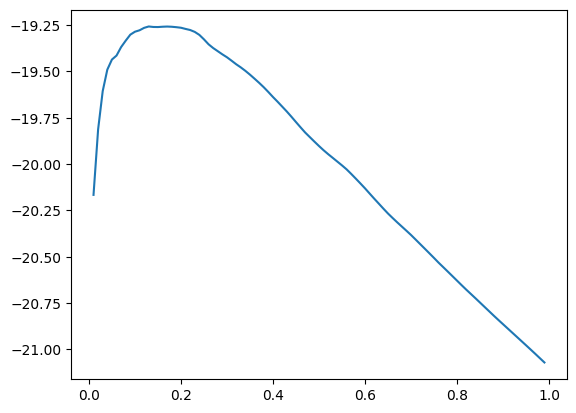

In [20]:
plt.plot(alpha, error)

In [21]:
err = tuple(zip(alpha, error))


In [22]:
df_err = pd.DataFrame(err, columns= ['alpha', 'error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
12,0.13,-19.257798


In [23]:
lm = LinearRegression()
lm.fit(X_train, y_train)
cross_val_score(lm, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)


array([-2.01637231e+01, -1.14646863e+08, -2.24262496e+01])

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
# Correctly set the max_features parameter
rf = RandomForestRegressor()

In [26]:
np.mean(cross_val_score(rf, X_train , y_train, scoring = 'neg_mean_absolute_error', cv =3))


-15.198437163513306

In [27]:
#tune model with GridSearch

from sklearn.model_selection import GridSearchCV

In [28]:
parameters = {
    'n_estimators': range(10, 300, 10),
    'criterion': ('squared_error', 'absolute_error'),  # Changed 'mse' to 'squared_error' and 'mae' to 'absolute_error'
    'max_features': ('auto', 'sqrt', 'log2')
}



In [29]:
gs = GridSearchCV(rf, parameters, scoring='neg_mean_absolute_error', cv=3)
gs.fit(X_train, y_train)


c:\Users\nayak\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
174 fits failed out of a total of 522.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
174 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\nayak\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\nayak\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\nayak\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('squared_error', 'absolute_error'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [30]:
gs.best_score_

-15.168476858261124

In [31]:
gs.best_estimator_

RandomForestRegressor(max_features='sqrt', n_estimators=60)

In [35]:
from sklearn.metrics import mean_absolute_error

In [32]:
tpred_lm = lm.predict(X_test)
print(tpred_lm)

[113.83767174  48.5        123.299078   110.33649422 154.8312258
 139.94767658 136.02688526  30.7105232   45.51476823  83.66055708
 153.57780709  77.00857442 117.9377128  132.50220425  42.99968586
 145.07629487  68.87772943  64.7193175  127.13511197  87.26532161
 101.58503326 109.91824074 149.94088379 112.21599153 148.29374144
 101.0379714   75.7493255  135.94456298  93.93222823 113.17255645
  69.65194076  52.11471652 143.41273052 113.47367932 105.60805619
  82.41659586  72.53626012 112.57795931  62.98138705 117.43787785
 169.676872   111.07730974  77.45665231 104.83492661 151.10276451
  90.75808219 153.21283211 120.91089634 146.66124101  86.18864242
 116.58432961 115.85285567 103.45524375 106.14354176  92.1173666
 131.71166095  77.45665231  89.80521275 169.32826007 137.90812398
 126.19412669 112.15380227 131.71904127 144.35898996 101.51135841
 107.5        106.13531738 137.20480945 115.1585599   89.30659987
 151.10276451 137.20480945  54.70527185 126.24333297  26.5
 101.51135841  71.0

In [33]:
lm_l.fit(X_train, y_train)
tpred_lml = lm_l.predict(X_test)
print(tpred_lml)

[106.8936655   78.75628033 110.21508878 129.59336194 140.2095996
 127.52183283 126.54598897  57.50836974  67.60461082  97.67423666
 100.50638703  79.01772609 121.89274435  99.52415736  81.73463597
 124.72158436  80.63513697  87.52549618 104.90924509  91.77897359
  91.71523492 103.98417211 146.25967341 100.82584702 140.37857923
  96.21229054  88.22113    130.60895541 100.39380055 104.91514954
  80.6107923   76.60898188 115.5520175  102.47549937  99.94795359
 104.88919649  83.24393351  93.61940461  90.08011435 119.979903
 107.17683448 114.3413404  100.63233544 110.38459569 147.50922614
 100.9439832  133.68876741 118.79821977 123.32098612 100.54421772
 119.01307663 111.94310341 100.25096418 106.59449362  93.44335583
 118.93464097 100.63233544  83.37216081 107.32176499 124.00218262
 102.54194101 100.73829091 119.00639558 129.68477369 101.69279477
 106.71832257 107.712229   126.91467011 128.25085303  99.76315636
 147.50922614 126.91467011  78.87240566 116.78617304  55.08140895
 101.69279477

In [34]:
tpred_rf = gs.best_estimator_.predict(X_test)
print(tpred_rf)

[111.55        51.24166667 150.26666667 122.66666667 151.475
 110.66666667 141.16666667  59.88333333  71.9         87.43333333
 148.94166667  85.06666667 111.21666667 118.24166667  87.68333333
 136.91666667  71.81666667  65.05833333 103.74166667  97.24166667
 116.51666667 147.96666667 147.85833333 114.7        140.94166667
 103.55        75.825      134.65       104.00833333  99.43333333
  91.50833333  52.85       122.10833333  99.78333333 104.325
  84.64166667  84.34166667 113.53333333  71.225      120.175
 209.76666667 119.175       87.40833333  76.49166667 140.69166667
  82.53333333 134.01666667 112.15       128.33333333 104.7
  92.68333333  80.05        77.85       102.89166667  90.59166667
 111.675       87.40833333  72.26666667 247.23333333 113.18333333
 117.24166667  99.45833333 101.33333333 130.65833333  87.46666667
 109.79166667 128.79166667 135.16666667 120.74166667 100.425
 140.69166667 135.16666667  78.81666667 118.04166667  30.975
  87.46666667  71.43333333  87.20833333  9

In [36]:
mean_absolute_error(y_test, (tpred_lm+tpred_rf)/2)

14.362157558590901

In [37]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump(pickl, open('model_file' + ".p", "wb"))

In [43]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']
model.predict(X_test.iloc[1, :].values.reshape(1, -1))

c:\Users\nayak\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([51.24166667])

In [44]:
list(X_test.iloc[1, :])

[3.6,
 0,
 0,
 0,
 1,
 34,
 0,
 0,
 0,
 1,
 4608,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Fa